In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

### Упражнение 1

In [2]:
x = sp.symbols('x')
y = sp.cos(x)

x0 = 1.0
diffs = [ sp.diff(y, x) ]
for i in range(4):
    diffs.append( sp.diff(diffs[-1], x) )

vals = [ d.subs(x, x0) for d in diffs ]

f = open("lab_10_1.txt", 'w')

fill = ' '
f.write(f" {fill:_>38}\n")
f.write(f"| Порядок производной | Значение в х0 |\n")
for i, v in enumerate(vals):
    f.write(f"|{fill:_>21}|{fill:_>15}|\n")
    f.write(f"|{i:20.0f} |{v:15.4f}|\n")

f.write(f"|{fill:_>21}|{fill:_>15}|\n")
    
f.close()

### Упражнение 2

In [3]:
def get_derivs(f, n, x0):
    assert n >= 1, "Количество производных должно быть положительным целым числом"
    
    diffs = [ f, sp.diff(f, x) ]
    for i in range(n-1):
        diffs.append( sp.diff(diffs[-1], x) )

    return [ d.subs(x, x0) for d in diffs ]

x = sp.symbols('x')
x0 = 0

f = sp.cos(x)
print( f"f(x) = cos(x):\n{get_derivs(f, 5, x0)}" )

f = sp.sin(x)
print( f"\nf(x) = sin(x):\n{get_derivs(f, 5, x0)}" )

f = sp.ln(x + 1)
print( f"\nf(x) = ln(x+1):\n{get_derivs(f, 5, x0)}" )

f(x) = cos(x):
[1, 0, -1, 0, 1, 0]

f(x) = sin(x):
[0, 1, 0, -1, 0, 1]

f(x) = ln(x+1):
[0, 1, -1, 2, -6, 24]


### Упражнение 3

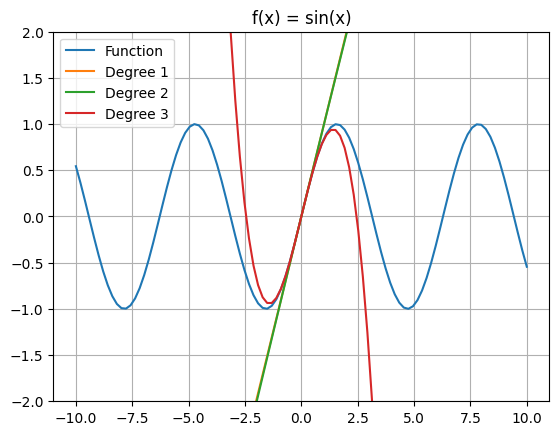

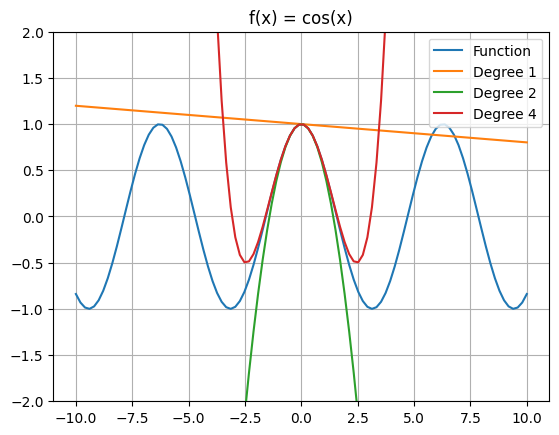

C:\Temp\ipykernel_332\3801146178.py:37: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(4+x)


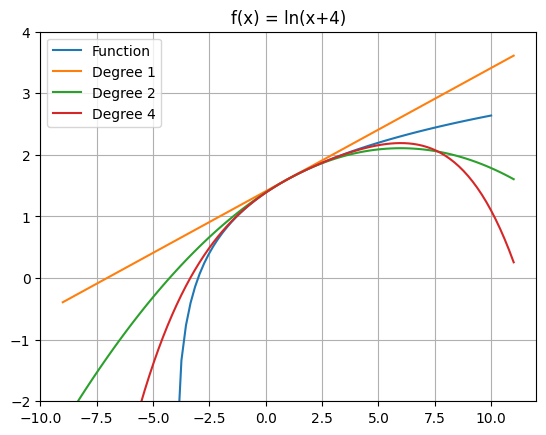

In [16]:
def get_taylor(f, x0, n=0, degs=[]):
    assert n > 0 or len(degs) > 0, "Необходимо указать порядок"
    
    taylor = []
        
    if n != 0:
        for deg in range(1, n+1):
            taylor.append( (deg, approximate_taylor_polynomial(
                                 f, x0, deg, 1, order=deg+2) ) )
    else:
        for deg in degs:
            taylor.append( (deg, approximate_taylor_polynomial(
                                 f, x0, deg, 1, order=deg+2) ) )
        
    return taylor

def plot_taylor(f, taylor, name='', ylim=(0, 0), x0=0):
    x = np.linspace(-10, 10, 100)
    y = f(x)
    plt.plot(x, f(x), label='Function')
    
    for i, t in taylor:
        plt.plot(x+x0, t(x), label=f'Degree {i}')
    
    plt.grid()
    plt.legend()
    if name != '': plt.title(name)
    if ylim != (0, 0): plt.ylim(ylim)
    plt.show()
      
f = lambda x: np.sin(x)
plot_taylor(f, get_taylor(f, 0, n=3), ylim=(-2, 2), name='f(x) = sin(x)')

f = lambda x: np.cos(x)
plot_taylor(f, get_taylor(f, 0, degs=[1, 2, 4]), ylim=(-2, 2), name='f(x) = cos(x)')

f = lambda x: np.log(4+x)
plot_taylor(f, get_taylor(f, 1, degs=[1, 2, 4]), ylim=(-2, 4), x0=1, name='f(x) = ln(x+4)')

### Упражнение С1

C:\Temp\ipykernel_332\3896924789.py:1: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.sqrt(4+x)


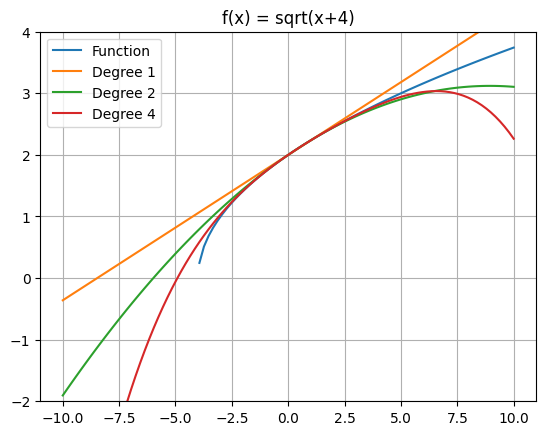

In [5]:
f = lambda x: np.sqrt(4+x)
plot_taylor(f, get_taylor(f, 0, degs=[1, 2, 4]), ylim=(-2, 4), name='f(x) = sqrt(x+4)')

### Упражнение С2

#### а)

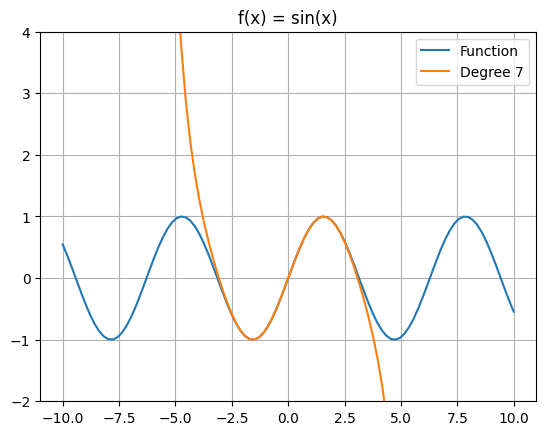

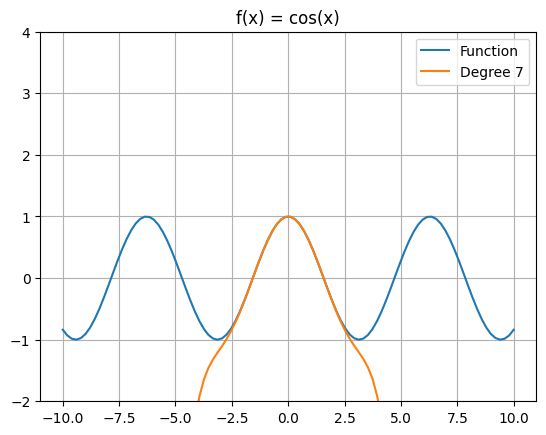

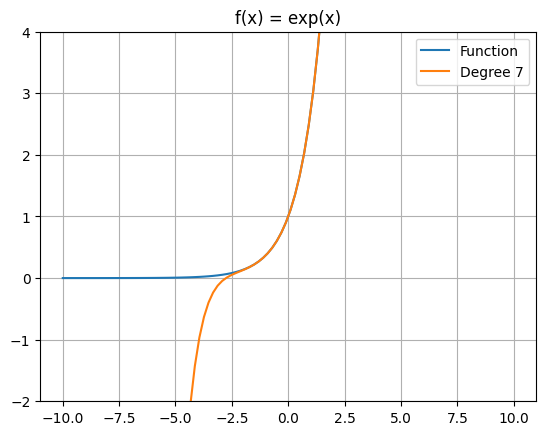

C:\Temp\ipykernel_332\4120043276.py:10: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(x+1)


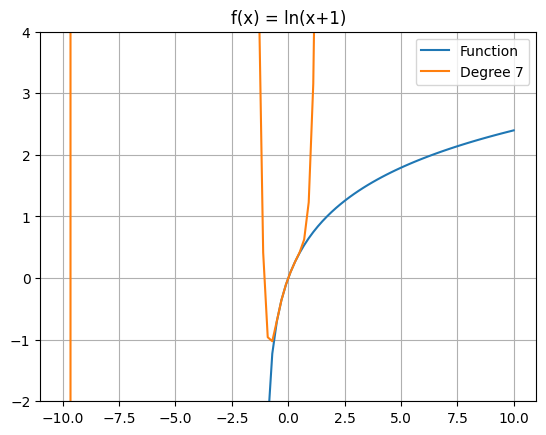

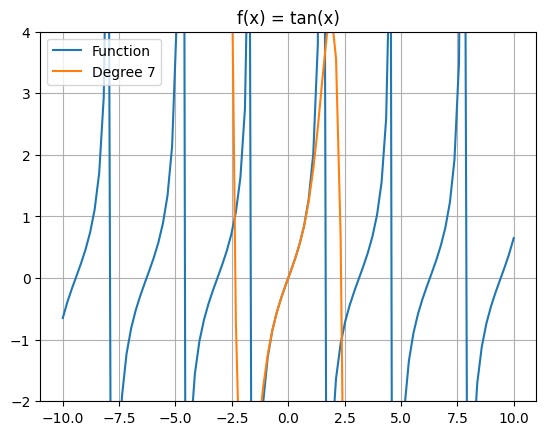

In [12]:
f = lambda x: np.sin(x)
plot_taylor(f, get_taylor(f, 0, degs=[7]), ylim=(-2, 4), name='f(x) = sin(x)')

f = lambda x: np.cos(x)
plot_taylor(f, get_taylor(f, 0, degs=[7]), ylim=(-2, 4), name='f(x) = cos(x)')

f = lambda x: np.exp(x)
plot_taylor(f, get_taylor(f, 0, degs=[7]), ylim=(-2, 4), name='f(x) = exp(x)')

f = lambda x: np.log(x+1)
plot_taylor(f, get_taylor(f, 0, degs=[7]), ylim=(-2, 4), name='f(x) = ln(x+1)')

f = lambda x: np.tan(x)
plot_taylor(f, get_taylor(f, 0, degs=[7]), ylim=(-2, 4), name='f(x) = tan(x)')

#### б)

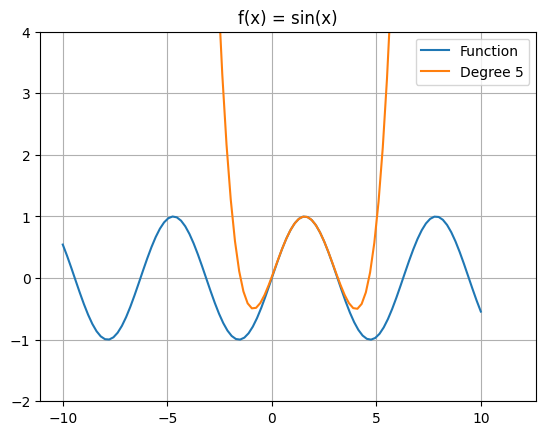

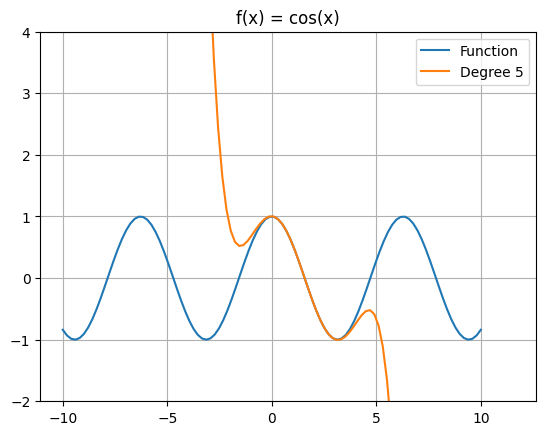

In [17]:
f = lambda x: np.sin(x)
plot_taylor(f, get_taylor(f, np.pi/2, degs=[5]), ylim=(-2, 4), x0=np.pi/2, name='f(x) = sin(x)')

f = lambda x: np.cos(x)
plot_taylor(f, get_taylor(f, np.pi/2, degs=[5]), ylim=(-2, 4), x0=np.pi/2, name='f(x) = cos(x)')